In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\ml_data\Diwali Sales Data.csv",encoding= 'unicode_escape')

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.shape

(11251, 13)

In [13]:
df=df[df['Amount'].notnull()]

In [15]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [18]:
df[df.duplicated()].size

104

In [19]:
df=df.drop_duplicates()

In [20]:
df.shape

(11231, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [24]:
df.drop('Cust_name',axis=1,inplace=True)

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [26]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

## EDA

In [27]:
df['Gender'].value_counts()

F    7828
M    3403
Name: Gender, dtype: int64

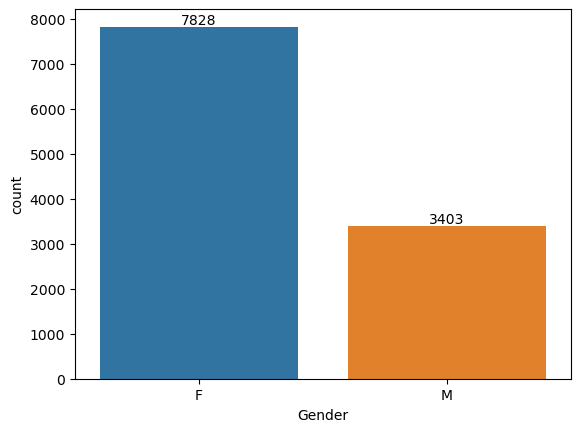

In [28]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74307682.43
1,M,31871146.00


<Axes: xlabel='Gender', ylabel='Amount'>

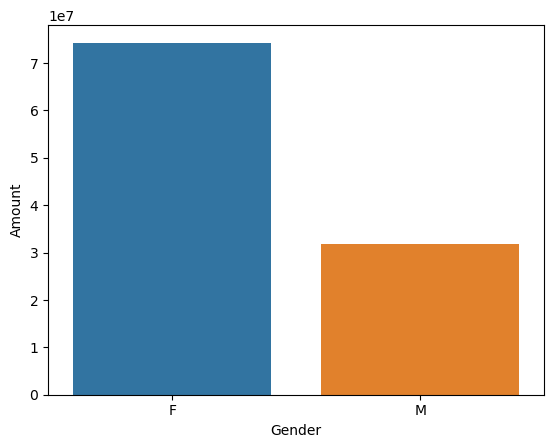

In [33]:
income_sales=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=income_sales)

In [34]:
## most of the buyers are female

In [35]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


<Axes: >

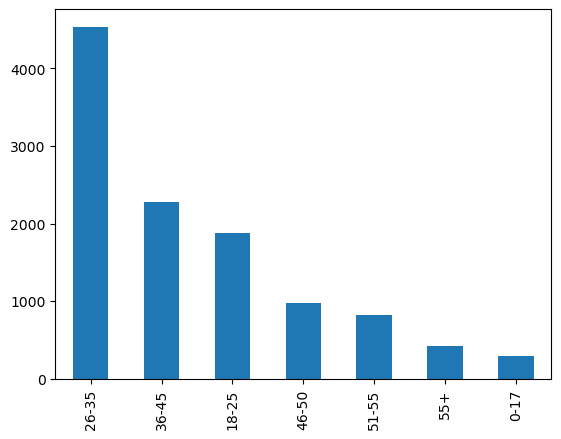

In [37]:
df['Age Group'].value_counts().plot(kind='bar')

<Axes: xlabel='Age Group', ylabel='count'>

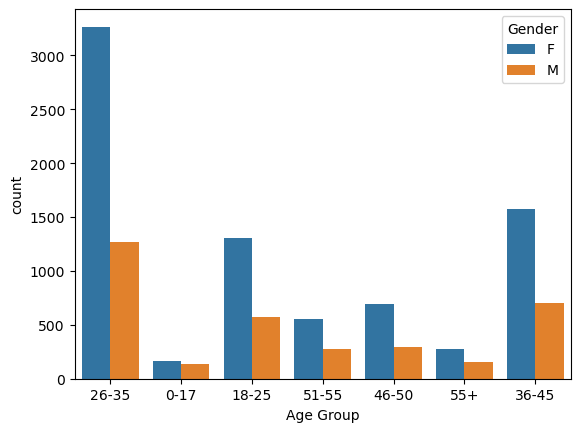

In [39]:
## We can draw a graph of age group people by considering the gender
sns.countplot(x='Age Group',hue='Gender',data=df)

In [ ]:
# from this we can conclude that from 26-35 age group females are more than the male

In [41]:
df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Age Group,Amount
2,26-35,42581768.94
3,36-45,22135136.49
1,18-25,17235530.00
4,46-50,9207844.00
5,51-55,8237909.00
6,55+,4080987.00
0,0-17,2699653.00


<Axes: xlabel='Age Group', ylabel='Amount'>

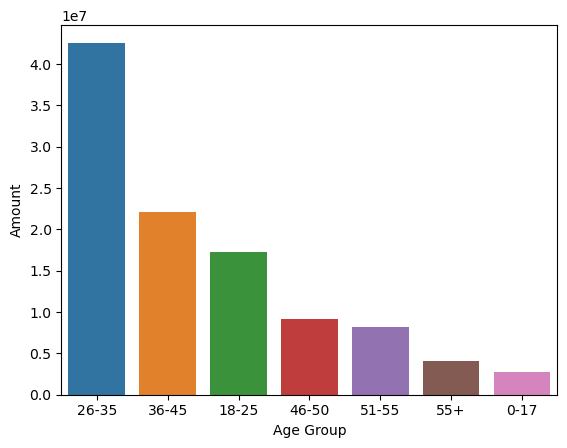

In [42]:
Amount_by_age_group=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=Amount_by_age_group)

In [43]:
# most of the people are from 26-35 age group and mainly females are doing most of the shopping

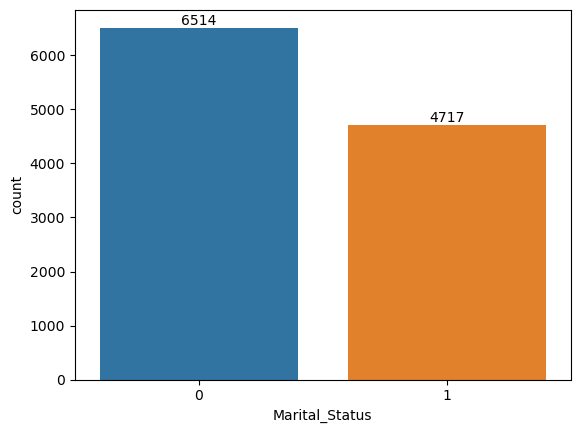

In [47]:
ax = sns.countplot(x = 'Marital_Status',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [48]:
# most of the peoples are married

In [50]:
df.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Marital_Status,Amount
0,0,62098736.44
1,1,44080091.99


<Axes: xlabel='Marital_Status', ylabel='Amount'>

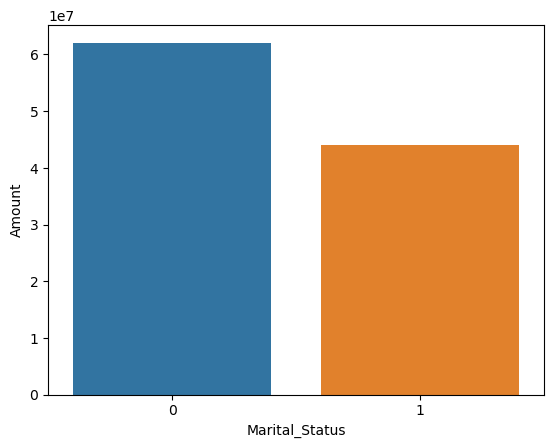

In [51]:
amount_marital_status=df.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=amount_marital_status)

In [52]:
# Married pearson are doing the more shopping

In [53]:
df.groupby(['Marital_Status',"Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Marital_Status,Gender,Amount
0,0,F,43778560.44
2,1,F,30529121.99
1,0,M,18320176.00
3,1,M,13550970.00


<Axes: xlabel='Marital_Status', ylabel='Amount'>

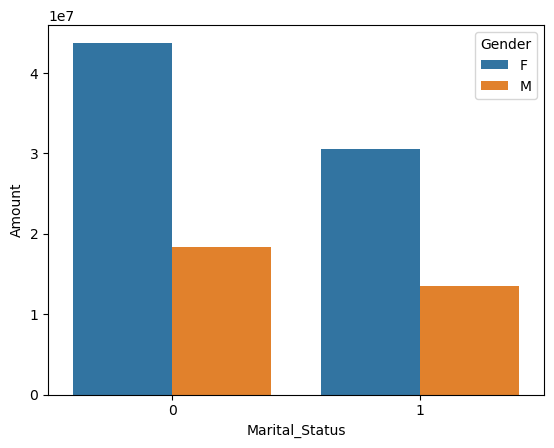

In [55]:
amount_marital_gender=df.groupby(['Marital_Status',"Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=amount_marital_gender,hue='Gender')

In [56]:
# Out of married person female had done most of the shopping

In [57]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [58]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [59]:
df['State']=df['State'].replace('Andhra\xa0Pradesh','Andhra Pradesh')

In [60]:
df['State'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [61]:
df['State'].value_counts()

Uttar Pradesh       1942
Maharashtra         1522
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar                433
Gujarat              426
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [62]:
df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,State,Amount
14,Uttar Pradesh,19346055.00
10,Maharashtra,14404467.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4217871.00
1,Bihar,4014669.00
3,Gujarat,3938159.00


<Axes: xlabel='State', ylabel='Amount'>

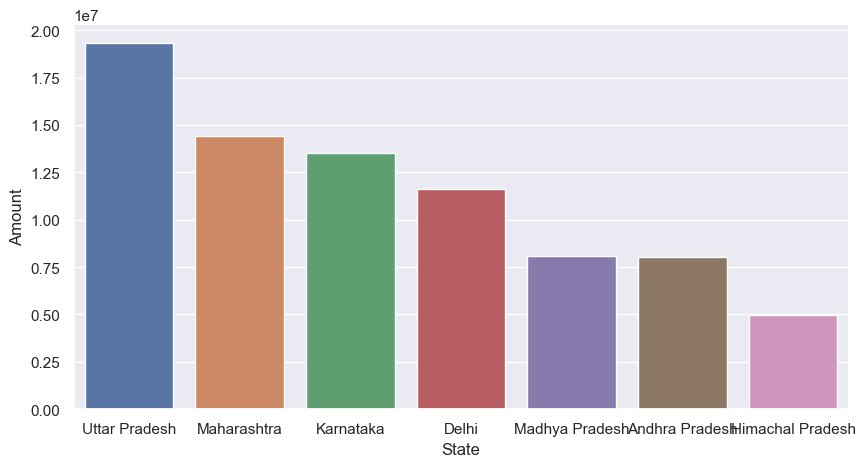

In [65]:
amount_by_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(7)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='State',y='Amount',data=amount_by_state)

In [66]:
## Utter pradesh followed by maharashtra followed by karnataka state people do more shopping than other state people

In [67]:
df.groupby(['State','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,State,Gender,Amount
28,Uttar Pradesh,F,13662105.00
20,Maharashtra,F,10551117.00
14,Karnataka,F,9933966.00
4,Delhi,F,8264499.45
29,Uttar Pradesh,M,5683950.00
0,Andhra Pradesh,F,5511219.99
18,Madhya Pradesh,F,5301046.00
21,Maharashtra,M,3853350.00
15,Karnataka,M,3589574.00
5,Delhi,M,3339320.00


<Axes: xlabel='State', ylabel='Amount'>

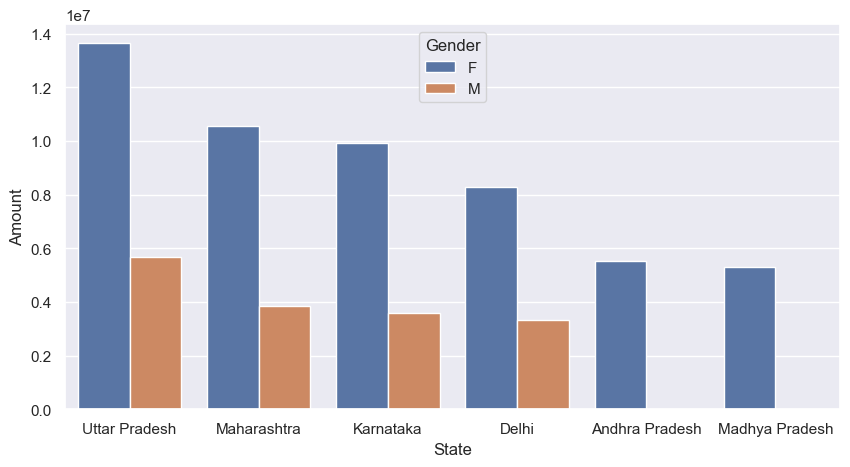

In [69]:
state_by_gender=df.groupby(['State','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='State',y='Amount',hue='Gender',data=state_by_gender)

In [ ]:
## Uttar Pradesh people do more shopping in which female has done more shopping than Male

In [70]:
df.head()


,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [71]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [72]:
df['Zone'].value_counts()

Central     4287
Southern    2693
Western     1948
Northern    1490
Eastern      813
Name: Zone, dtype: int64

In [74]:
df.groupby(['Zone'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Zone,Amount
0,Central,41571960.45
3,Southern,26606668.98
4,Western,18342626.00
2,Northern,12616448.00
1,Eastern,7041125.00


<Axes: xlabel='Zone', ylabel='Amount'>

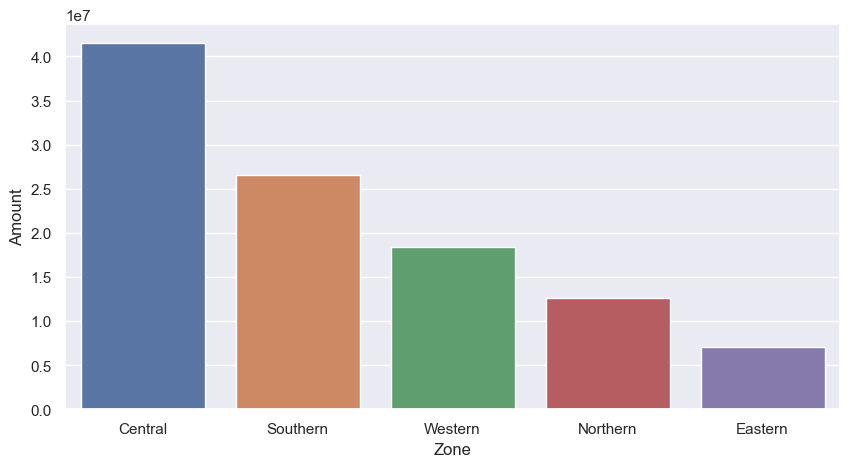

In [75]:
shopping_by_zone=df.groupby(['Zone'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Zone',y='Amount',data=shopping_by_zone)

In [76]:
# Central Zone done more shopping

In [78]:
df.groupby(['Zone'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

,Zone,Orders
0,Central,10619
3,Southern,6740
4,Western,4861
2,Northern,3724
1,Eastern,2011


In [79]:
#most of the orders are done from the Central Zone

In [80]:
df.groupby(['Zone','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Zone,Gender,Amount
0,Central,F,28820668.45
6,Southern,F,18793087.98
8,Western,F,13375456.00
1,Central,M,12751292.00
4,Northern,F,8553002.00
7,Southern,M,7813581.00
9,Western,M,4967170.00
2,Eastern,F,4765468.00
5,Northern,M,4063446.00
3,Eastern,M,2275657.00


<Axes: xlabel='Zone', ylabel='Amount'>

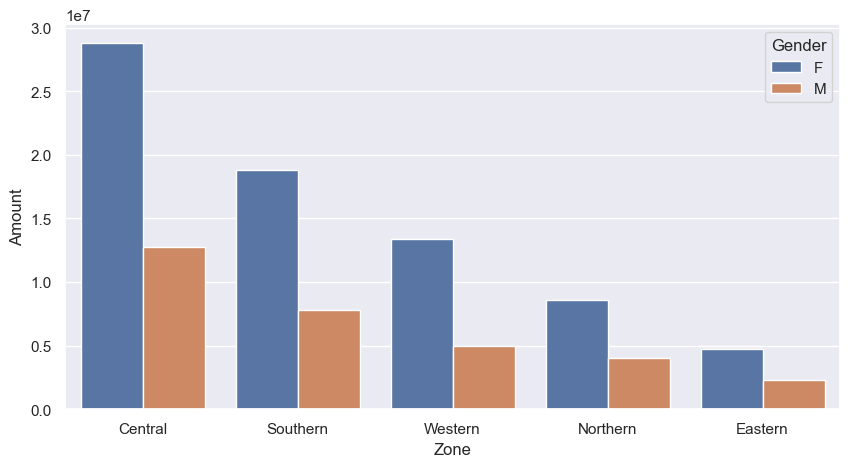

In [81]:
shopping_by_gender_zone=df.groupby(['Zone','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Zone',y='Amount',hue='Gender',data=shopping_by_gender_zone)

In [82]:
# In zone Central zone female purchase more things

In [83]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [84]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

In [85]:
df['Occupation'].value_counts()

IT Sector          1581
Healthcare         1408
Aviation           1309
Banking            1137
Govt                854
Hospitality         700
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             349
Agriculture         282
Name: Occupation, dtype: int64

In [86]:
df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Occupation,Amount
10,IT Sector,14741862.00
8,Healthcare,13034587.49
2,Aviation,12599994.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6337633.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


<Axes: xlabel='Occupation', ylabel='Amount'>

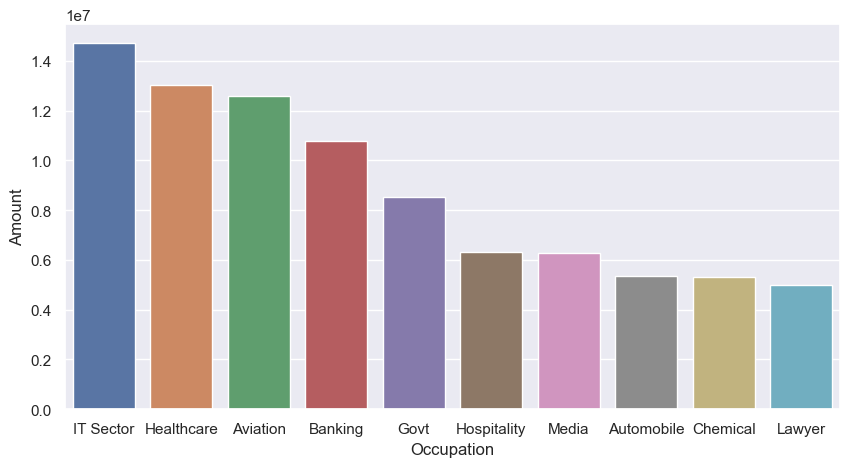

In [87]:
shopping_by_occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='Occupation',y='Amount',data=shopping_by_occupation)

In [88]:
# those are from the IT ,Healthcare and Aviation Sector they are purchased more things

In [89]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [90]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [91]:
df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16484472.00
5,Electronics & Gadgets,15607657.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1935041.99
15,Stationery,1676051.50


<Axes: xlabel='Product_Category', ylabel='Amount'>

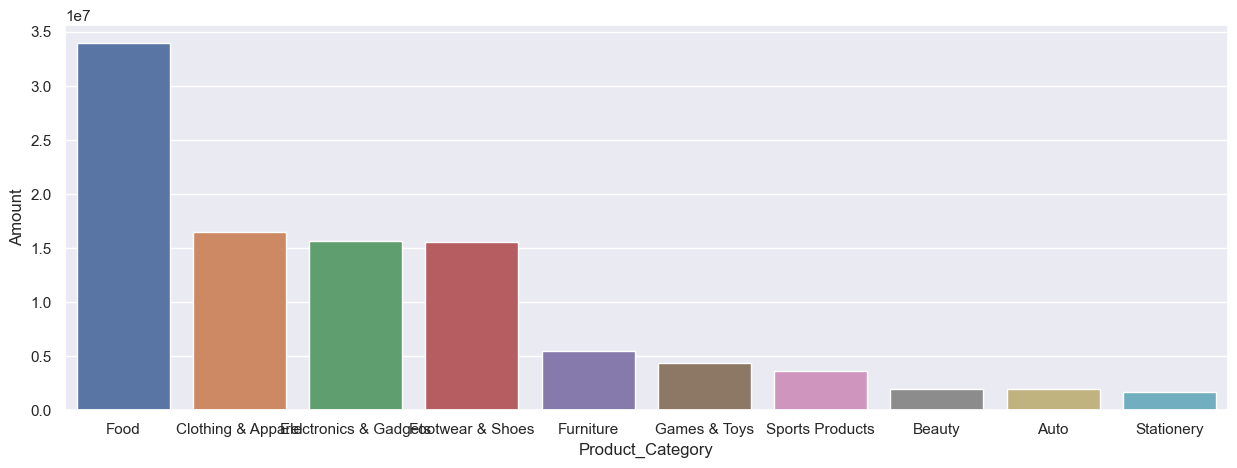

In [94]:
shopping_by_product_category=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product_Category',y='Amount',data=shopping_by_product_category)

In [95]:
# Most of the purchased thing is food then followed by clothing and apparel

<Axes: xlabel='Gender', ylabel='Orders'>

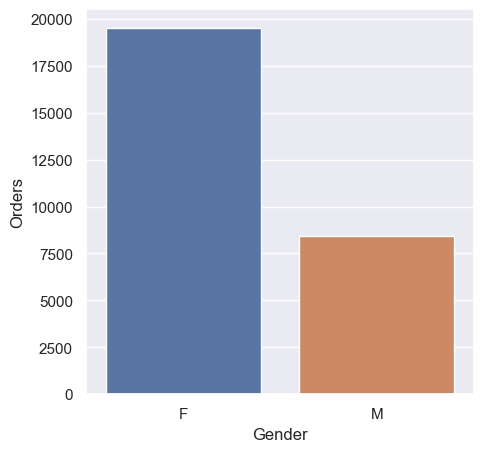

In [102]:
orders_by_gender=df.groupby(['Gender'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Gender',y='Orders',data=orders_by_gender)

## Conclusion
### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

In [103]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [106]:
df.drop('Age Group',axis=1,inplace=True)

In [107]:
df.head()

,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le=LabelEncoder()

In [115]:
columns=df.select_dtypes(include=object).columns

In [118]:
for i in columns:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,0,28,0,10,4,8,0,1,23952.0
1,0,35,1,0,3,7,0,3,23934.0
2,0,35,1,14,0,1,0,3,23924.0
3,1,16,0,7,3,5,0,2,23912.0
4,1,28,1,3,4,6,0,2,23877.0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 11250
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            11231 non-null  int32  
 1   Age               11231 non-null  int64  
 2   Marital_Status    11231 non-null  int64  
 3   State             11231 non-null  int32  
 4   Zone              11231 non-null  int32  
 5   Occupation        11231 non-null  int32  
 6   Product_Category  11231 non-null  int32  
 7   Orders            11231 non-null  int64  
 8   Amount            11231 non-null  float64
dtypes: float64(1), int32(5), int64(3)
memory usage: 916.1 KB


In [121]:
X=df.drop('Amount',axis=1)
y=df['Amount']

In [122]:
X

,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders
0,0,28,0,10,4,8,0,1
1,0,35,1,0,3,7,0,3
2,0,35,1,14,0,1,0,3
3,1,16,0,7,3,5,0,2
4,1,28,1,3,4,6,0,2
...,...,...,...,...,...,...,...,...
11246,1,19,1,10,4,4,12,4
11247,1,33,0,4,2,8,17,3
11248,0,40,0,9,0,14,12,4
11249,1,37,0,7,3,0,12,3


In [123]:
y

0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11231, dtype: float64

In [124]:
# Split the data
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [126]:
# Scaling down the feature
from sklearn.preprocessing import StandardScaler

In [128]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lr=LinearRegression()

In [131]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [132]:
y_linear_pred=lr.predict(X_test_scaled)

In [133]:
y_linear_pred

array([10034.3182072 ,  9657.8088006 ,  9900.36330964, ...,
        9496.79049286,  8527.53070004,  8838.88305073])

In [136]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [138]:
mse=mean_squared_error(y_test,y_linear_pred)
mae=mean_absolute_error(y_test,y_linear_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

26253125.269141678
4132.796481847677
5123.780368940659


In [139]:
r2_score(y_test,y_linear_pred)

0.01600935083298216